In [1]:
%matplotlib inline
import sys
if '../' not in sys.path:
    sys.path.append('../')
from datetime import datetime, timedelta
from dateutil import parser
import logging
logging.basicConfig()

In [2]:
import hapi_client_poc as hapi
hapi.log.setLevel(logging.DEBUG)

# Server Capabilities

In [3]:
capabilities = hapi.get_capabilities('http://hapi-server.org/servers/SSCWeb/hapi')
print(type(capabilities))
print(capabilities.outputFormats)
print(capabilities)

DEBUG:hapi_client_poc:New request url:  http://hapi-server.org/servers/SSCWeb/hapi/capabilities?
DEBUG:hapi_client_poc:success!


<class 'hapi_client_poc.Capabilities'>
['csv', 'binary', 'json']
{
 "outputFormats": [
  "csv",
  "binary",
  "json"
 ]
}


# Server Catalog

In [4]:
catalog = hapi.get_catalog('http://hapi-server.org/servers/SSCWeb/hapi')
type(catalog)
print(catalog[:3])

DEBUG:hapi_client_poc:New request url:  http://hapi-server.org/servers/SSCWeb/hapi/catalog?
DEBUG:hapi_client_poc:success!


[Dataset:
 id: ace
 title: ACE, Dataset:
 id: active
 title: Active, Dataset:
 id: aerocube6a
 title: AEROCUBE-6A]


## Dataset

In [5]:
dataset = catalog[2]
print(type(dataset))
print(dataset)

<class 'hapi_client_poc.Dataset'>
Dataset:
 id: aerocube6a
 title: AEROCUBE-6A


### Dataset description

In [6]:
print(str(dataset.description)[:500])

DEBUG:hapi_client_poc:New request url:  http://hapi-server.org/servers/SSCWeb/hapi/info?id=aerocube6a
DEBUG:hapi_client_poc:success!


DatasetInfo:
 startDate: 2014-06-29T00:00:00.000Z
 stopDate: 2020-12-13T00:00:00.000Z
 parameters:   Time:   Parameter:
   name: Time
   type: isotime
   units: UTC
   fill: None
   length: 18
  X_TOD:   Parameter:
   name: X_TOD
   type: double
   units: R_E
   description: X Position in the Geocentric Equatorial Inertial coordinate system, also known as True Equator and True Equinox of Date, True of Date TOD, ECI, or GCI
   fill: 1e31
  Y_TOD:   Parameter:
   name: Y_TOD
   type: double
   uni


## Parameters

In [7]:
print(str(dataset.description.parameters)[:500])

{'Time': Parameter:
 name: Time
 type: isotime
 units: UTC
 fill: None
 length: 18, 'X_TOD': Parameter:
 name: X_TOD
 type: double
 units: R_E
 description: X Position in the Geocentric Equatorial Inertial coordinate system, also known as True Equator and True Equinox of Date, True of Date TOD, ECI, or GCI
 fill: 1e31, 'Y_TOD': Parameter:
 name: Y_TOD
 type: double
 units: R_E
 description: Y Position in the Geocentric Equatorial Inertial coordinate system, also known as True Equator and True Eq


# Data

In [8]:
start = parser.parse(dataset.description.startDate, fuzzy=True)

data=hapi.get_data('http://hapi-server.org/servers/SSCWeb/hapi', 
                   dataset.id, 
                   start+timedelta(days=800), 
                   start+timedelta(days=801))

DEBUG:hapi_client_poc:New request url:  http://hapi-server.org/servers/SSCWeb/hapi/info?id=aerocube6a
DEBUG:hapi_client_poc:success!
DEBUG:hapi_client_poc:New request url:  http://hapi-server.org/servers/SSCWeb/hapi/data?id=aerocube6a&time.min=2016-09-06T00:00:00Z&time.max=2016-09-07T00:00:00Z&format=csv
DEBUG:hapi_client_poc:success!


/usr/lib64/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='0'>

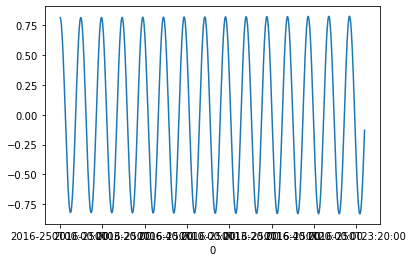

In [9]:
data[1].plot()

# Caching
Successful requests are cached so abusing API cost nothing for both server and client

In [10]:
%timeit hapi.get_catalog('http://hapi-server.org/servers/SSCWeb/hapi')

530 ns ± 2.48 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Context managers

In [15]:
with hapi.hapi_server('http://hapi-server.org/servers/SSCWeb/hapi') as server:
    print(server.get_capabilities())
    print(str(server.get_catalog())[:500])

{
 "outputFormats": [
  "csv",
  "binary",
  "json"
 ]
}
[Dataset:
 id: ace
 title: ACE, Dataset:
 id: active
 title: Active, Dataset:
 id: aerocube6a
 title: AEROCUBE-6A, Dataset:
 id: aerocube6b
 title: AEROCUBE-6B, Dataset:
 id: aim
 title: AIM, Dataset:
 id: akebono
 title: Akebono, Dataset:
 id: alouette1
 title: Alouette-1, Dataset:
 id: alouette2
 title: Alouette-2, Dataset:
 id: apex
 title: APEX-MAIN, Dataset:
 id: aqua
 title: Aqua, Dataset:
 id: arase
 title: Arase (ERG), Dataset:
 id: ariel4
 title: ARIEL-4, Dataset:
 id: artemisp1
 title:
